# How to Configure XGBoost for Imbalanced Classification

* https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

from xgboost import XGBClassifier

In [10]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=2, weights=[0.99], flip_y=0,
                           random_state=7)

Counter({0: 9900, 1: 100})
Estimate: 99.000


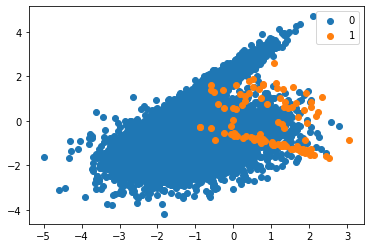

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(y)
print(counter)

estimate = counter[0] / counter[1]  # scale_pos_weight
print('Estimate: %.3f' % estimate)

for label, _ in counter.items():
    indices = np.where(y == label)[0]
    plt.scatter(X[indices, 0], X[indices, 1], label=str(label))
    
plt.legend()
plt.show()

In [12]:
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC-AUC: %.4f' % scores.mean())

Mean ROC-AUC: 0.9605


In [5]:
model = XGBClassifier(scale_pos_weight=99)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC-AUC: %.4f' % scores.mean())

Mean ROC-AUC: 0.9547


In [8]:
model = XGBClassifier()
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid_result = grid.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960522 using {'scale_pos_weight': 1}
0.960522 (0.024031) with: {'scale_pos_weight': 1}
0.956106 (0.029382) with: {'scale_pos_weight': 10}
0.955189 (0.029265) with: {'scale_pos_weight': 25}
0.952980 (0.028971) with: {'scale_pos_weight': 50}
0.951190 (0.031723) with: {'scale_pos_weight': 75}
0.954692 (0.027654) with: {'scale_pos_weight': 99}
0.953470 (0.028217) with: {'scale_pos_weight': 100}
0.947552 (0.029872) with: {'scale_pos_weight': 1000}
